In [1]:
import numpy as np 
from andreas_metrics import *
from sklearn.metrics import pairwise_distances

In [ ]:
def neighborhood_hit(X: np.array, y: np.ndarray, k=7):
    diff = pairwise_distances(X)

    from sklearn.neighbors import NearestNeighbors as KNN
    real = KNN(n_neighbors=k,metric="precomputed").fit(diff)

    I = [set(x) for x in ideal.kneighbors()[1]]
    R = [set(x) for x in real.kneighbors()[1]]
    tot = sum( len(high.intersection(low)) for high,low in zip(I,R) )
    return tot / (X.shape[0] * k)

In [15]:
dataname = "penguins"

In [16]:
X = np.loadtxt(f"embeddings/{dataname}_ens-t-sne_3d.txt")
y = np.loadtxt(f"embeddings/labels_{dataname}.txt")
y0 = y[:,0]
y1 = y[:,1]

In [17]:
metric_neighborhood_hit(X,y0,k=5)

0.9897897897897898

In [18]:
alg_names = ["ens-t-sne", "mpse", "mds", "tsne", "umap"]
for alg in alg_names:
    X = np.loadtxt(f"embeddings/{dataname}_{alg}_3d.txt")
    print(f"{alg} scores {metric_neighborhood_hit(X,y0,5)}")

ens-t-sne scores 0.9897897897897898
mpse scores 0.46126126126126127
mds scores 0.984984984984985
tsne scores 0.8954954954954957
umap scores 0.9933933933933933


In [19]:
alg_embeddings = {alg: np.loadtxt(f"embeddings/{dataname}_{alg}_3d.txt") for alg in alg_names}

In [20]:
end = 150

In [21]:
alg_scores = {
    alg: [(metric_neighborhood_hit(val,y0,n) + metric_neighborhood_hit(val,y1,n)) / 2 for n in range(2,end)] for alg,val in alg_embeddings.items()
}

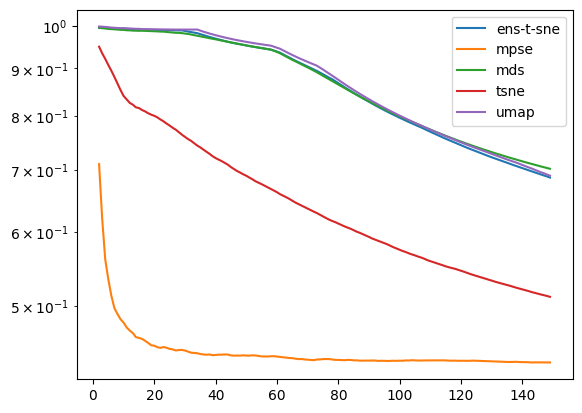

In [22]:
import pylab as plt 
for alg, val in alg_scores.items():
    plt.plot(range(2,end), val, label=alg)
plt.legend()
plt.yscale("log")
plt.show()

In [23]:
from sklearn.metrics import pairwise_distances
D_high = pairwise_distances(np.loadtxt(f"embeddings/highd_{dataname}.txt"))

In [25]:
D_low = pairwise_distances(alg_embeddings["ens-t-sne"])
for alg, emb in alg_embeddings.items():
    dlow = pairwise_distances(emb)
    print(f"{alg} -> {metric_trustworthiness(D_high,dlow,5)}")

ens-t-sne -> 0.9908856548856548
mpse -> 0.49801801801801804
mds -> 0.9754049434049434
tsne -> 0.8788671748671748
umap -> 0.9907082467082468


In [30]:
end = 10

In [31]:
distances = {alg: pairwise_distances(emb) for alg, emb in alg_embeddings.items()}
alg_scores = {
    alg: [metric_trustworthiness(D_high, distances[alg], n) for n in range(2,end)] for alg in distances
}

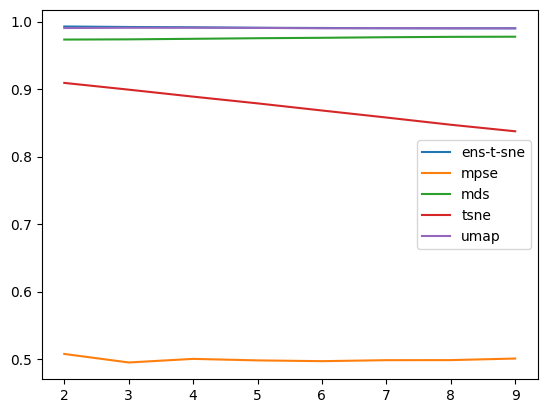

In [32]:
for alg, val in alg_scores.items():
    plt.plot(range(2,end), val, label=alg)
plt.legend()
plt.show()